In [407]:
import json
import os
from scipy import stats
from scipy.stats import normaltest, mannwhitneyu, ttest_ind, shapiro
import scipy
import numpy as np
import matplotlib.pyplot as plt

# PROJECT = ['next', 'react', 'sveltekit']
PROJECT = 'next'
SCORING_TYPE = "MAX"


In [408]:
f = open(f'../processed_data/{SCORING_TYPE}/{PROJECT}/TEST/dim_x.json')
dataset_1 = json.loads(f.read())
f.close()
# print(dataset_1)

f = open(f'../processed_data/{SCORING_TYPE}/{PROJECT}/TEST/dim_y.json')
dataset_2 = json.loads(f.read())
f.close()
# print(angular_dataset)

In [409]:
def t_test():
    stat, p_val = ttest_ind(dataset_1, dataset_2,alternative='two-sided', trim=0)
    print("P-Value: " , p_val)
    isDif = ' no ' if p_val >= 0.05 else ' '
    print(f'There is{isDif}statistical different between test and non-test file in {PROJECT} project')
    # print("stat = ", stat)

# t_test()

In [410]:
def mann_whitney():
    stat, p_val = mannwhitneyu(dataset_1, dataset_2, method="auto")
    # print(U1)
    print("P-Value: ", p_val)
    isDif = ' no ' if p_val >= 0.05 else ' '
    print(f'There is{isDif}statistical different\nbetween test and non-test file in {PROJECT} project')
    # print("stat = ", stat)
# mann_whitney()

In [411]:

if normaltest(dataset_1).pvalue >= 0.005 and normaltest(dataset_2).pvalue >= 0.005:
     print ('The dataset is distributed normally')
     t_test()
     
else:
     print('The dataset is not distributed normally')
     mann_whitney()


The dataset is not distributed normally
P-Value:  1.037112857734192e-235
There is statistical different
between test and non-test file in next project


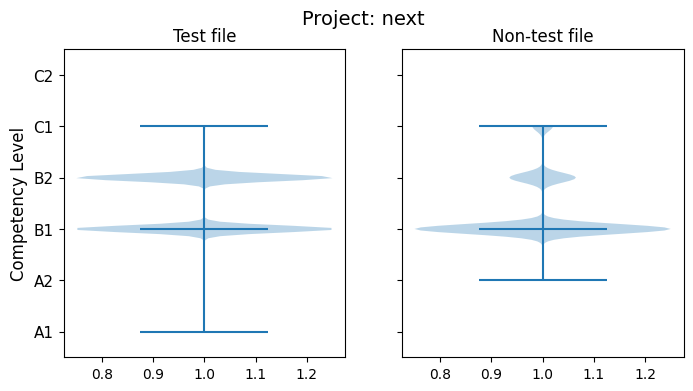

In [412]:
bars = ['Test', 'Non-Test']

# list_dataset = []
# list_dataset.append(dataset_1)
# list_dataset.append(dataset_2)

# plt.axis([0, 6, 0, 3])

figure, axe = plt.subplots(nrows = 1,
							ncols = 2,
							figsize =(8, 4),
							sharey = True)

figure.suptitle(f"Project: {PROJECT}", fontsize=14)

axe[0].set_title('Test file', fontsize=12)
axe[0].set_ylabel('Competency Level', fontsize=12)
axe[0].yaxis.set_ticks([1, 2, 3, 4, 5 ,6])
axe[0].yaxis.set_ticklabels(['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], fontsize=11)
axe[0].violinplot(dataset_1, showmedians=True)

axe[1].set_title('Non-test file', fontsize=12)
axe[1].yaxis.set_ticks([1, 2, 3, 4, 5 ,6])
# axe[1].set_ylabel('Competency Level', fontsize=12)
axe[1].yaxis.set_ticklabels(['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], fontsize=11)
axe[1].violinplot(dataset_2, showmedians=True)
# axe[1].set_xticklabels([])
# plt.show()
plt.ylim(0.5, 6.5)
plt.savefig(f"fig/violin-{PROJECT}-test.pdf",bbox_inches='tight', dpi=150)

# plt.xlabel(f'project: {PROJECT}')
# plt.ylabel('Competency Level')

# plt.violinplot([dataset_1, dataset_2], showmeans=True, data=['Test', 'Non-Test'])
# plt.show()

max = 23918


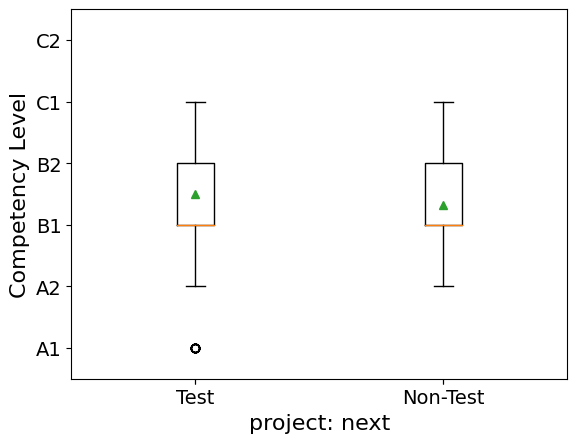

In [413]:
LENGTH = max(len(dataset_1), len(dataset_2))

print(f'max = {LENGTH}')

arr = [[], [], []]

# for i in range(LENGTH):
#     x_val = dataset_1[i]
#     y_val = dataset_2[i]
#     if x_val < 20:
#         arr[0].append(y_val)
#     elif 20 <= x_val < 40:
#         arr[1].append(y_val)
#     elif 40 <= x_val < 60:
#         arr[2].append(y_val)

bars = ['Test', 'Non-Test']

# plt.axis([1, 6, 3, 4])
plt.ylim(0.5, 6.5)

plt.xlabel(f'project: {PROJECT}', fontsize=14)
plt.ylabel('Competency Level', fontsize=14)
plt.yticks([1, 2, 3, 4, 5, 6], ['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], fontsize=14)
plt.xticks([1, 2], bars, fontsize=14)
plt.boxplot([dataset_1, dataset_2], labels=bars, showmeans=True)
plt.savefig(f"fig/box-{PROJECT}-test.pdf", bbox_inches='tight', dpi=150)
# plt.show()

(array([   18.,    15., 12043., 11751.,    91.,     0.]),
 array([1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 6 artists>)

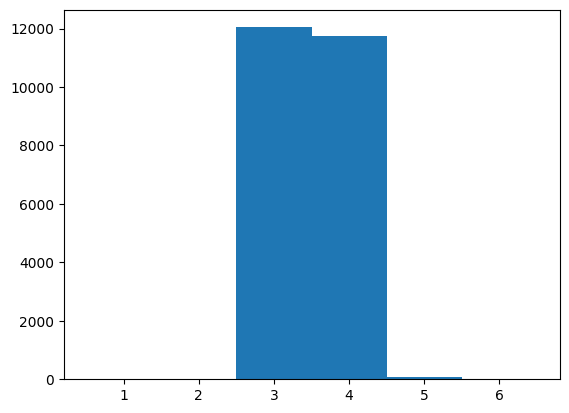

In [414]:
plt.hist(np.array(dataset_1), bins=range(1,8), align='left', rwidth=1)

(array([0.000e+00, 3.000e+00, 5.938e+03, 1.545e+03, 4.760e+02, 0.000e+00]),
 array([1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 6 artists>)

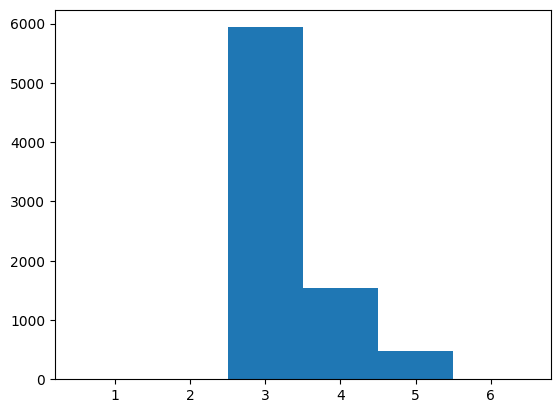

In [415]:
plt.hist(np.array(dataset_2), bins=range(1,8), align='left', rwidth=1)

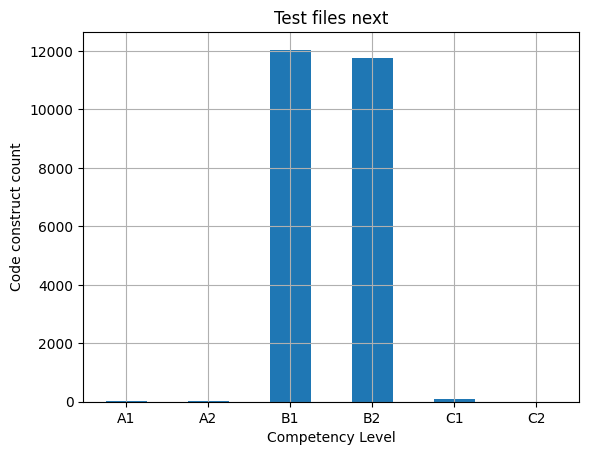

In [416]:


# Fixing random state for reproducibility
# np.random.seed(19680801)

# mu, sigma = 100, 15
# x = mu + sigma * np.random.randn(10000)

# the histogram of the data
# print(react_dataset)
# narray = np.array(dataset_1)
# n, bins, patches = plt.hist(narray)

# plt.axis([0, 6, 0, 5000])
plt.xlabel('Competency Level')
plt.ylabel('Code construct count')
plt.title(f'Test files {PROJECT}')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(40, 160)
# plt.ylim(0, 0.03)
plt.grid(True)
header = [
        "A1",
        "A2",
        "B1",
        "B2",
        "C1",
        "C2",
]

plt.hist(np.array(dataset_1), bins=range(1, 8), align='left', rwidth=0.5)

# Set the x-axis tick labels
plt.xticks(np.arange(1, 7), ['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
# plt.hist(np.array(dataset_1), bins=range(1,8),  align='left', rwidth=0.5)
# plt.show()
plt.savefig(f"hist-{PROJECT}-testfile.pdf",bbox_inches='tight', dpi=150)

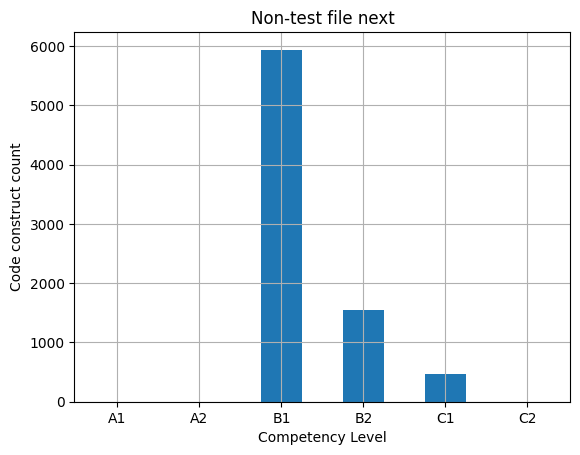

In [417]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
# np.random.seed(19680801)

# mu, sigma = 100, 15
# x = mu + sigma * np.random.randn(10000)

# the histogram of the data
# print(react_dataset)
# narray = np.array(dataset_1)
# n, bins, patches = plt.hist(narray)

# plt.axis([0, 6, 0, 1800])
plt.xlabel('Competency Level')
plt.ylabel('Code construct count')
plt.title(f'Non-test file {PROJECT}')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(40, 160)
# plt.ylim(0, 0.03)
plt.grid(True)

data = [2935,
        909,
        1300,
        33,
        13,
        0]

header = [
        "A1",
        "A2",
        "B1",
        "B2",
        "C1",
        "C2",
]

plt.hist(np.array(dataset_2), bins=range(1, 8), align='left', rwidth=0.5)

# Set the x-axis tick labels
plt.xticks(np.arange(1, 7), ['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
# plt.hist(np.array(dataset_1), bins=range(1,8),  align='left', rwidth=0.5)
# plt.show()
plt.savefig(f"hist-{PROJECT}-nontestfile.pdf",bbox_inches='tight', dpi=150)

In [418]:
PROJECT_LIST = ['next', 'react', 'sveltekit']

test_dataset = []
non_test_dataset = []

for project in PROJECT_LIST:
    f = open(f'../processed_data/{PROJECT}/TEST/dim_x.json')
    dataset_1 = json.loads(f.read())
    test_dataset.extend(dataset_1)
    f.close()

    f = open(f'../processed_data/{PROJECT}/TEST/dim_y.json')
    dataset_2 = json.loads(f.read())
    non_test_dataset.extend(dataset_2)
    f.close()


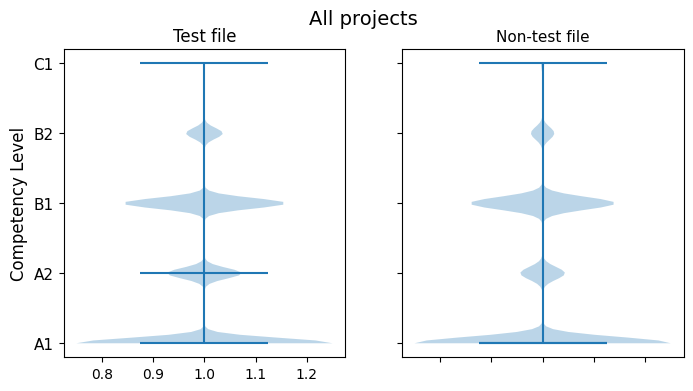

In [419]:
bars = ['Test', 'Non-Test']

# plt.axis([0, 6, 0, 3])

figure, axe = plt.subplots(nrows = 1,
							ncols = 2,
							figsize =(8, 4),
							sharey = True)

figure.suptitle(f"All projects", fontsize=14)

axe[0].set_title('Test file', fontsize=12)
axe[0].set_ylabel('Competency Level', fontsize=12)
axe[0].yaxis.set_ticks([1, 2, 3, 4, 5 ,6])
axe[0].yaxis.set_ticklabels(['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], fontsize=11)
axe[0].violinplot(test_dataset, showmedians=True)

# axe[1].xaxis.set_ticklabels([])
axe[1].set_title('Non-test file', fontsize=11)
axe[1].violinplot(non_test_dataset, showmedians=True)
# plt.show()
plt.savefig(f"violin-all-test.pdf",bbox_inches='tight', dpi=150)

In [420]:
stat, p_val = ttest_ind(test_dataset, non_test_dataset, alternative='two-sided', trim=0)
print("P-Value: " , p_val)
isDif = ' no ' if p_val >= 0.05 else ' '
print(f'There is{isDif}statistical different between test and non-test file in all project')

P-Value:  5.345034693000663e-194
There is statistical different between test and non-test file in all project
